In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import yfinance as yf
%matplotlib inline

In [3]:
alpaca_api_key = ("PK5PHZ0CP10IEMFR36L2")
alpaca_secret_key = ("p6dBWjuEvDpiw2xpCkSWcBmpfWFfpkw96WhdbKfY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
sp = yf.download('^GSPC', start='2016-11-01', end='2023-11-02')

sp

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-11-01  2128.679932  2131.449951  2097.850098  2111.719971  2111.719971   
2016-11-02  2109.429932  2111.760010  2094.000000  2097.939941  2097.939941   
2016-11-03  2098.800049  2102.560059  2085.229980  2088.659912  2088.659912   
2016-11-04  2083.790039  2099.070068  2083.790039  2085.179932  2085.179932   
2016-11-07  2100.590088  2132.000000  2100.590088  2131.520020  2131.520020   
...                 ...          ...          ...          ...          ...   
2023-10-26  4175.990234  4183.600098  4127.899902  4137.229980  4137.229980   
2023-10-27  4152.930176  4156.700195  4103.779785  4117.370117  4117.370117   
2023-10-30  4139.390137  4177.470215  4132.939941  4166.819824  4166.819824   
2023-10-31  4171.330078  4195.549805  4153.120117  4193.799805  4193.799805   
2023-11-01  4201.270020  4245.640137  4197.740234  4237.859863  4237.859863   

                Volume  
Date                    
2016-11-01  4539190000  
2016-11-02  4289120000  
2016-11-03  3892100000  
2016-11-04  3841910000  
2016-11-07  3739720000  
...                ...  
2023-10-26  4277640000  
2023-10-27  4019500000  
2023-10-30  3911140000  
2023-10-31  4249470000  
2023-11-01  4224900000  

[1762 rows x 6 columns]

In [6]:
sp_df =pd.DataFrame(sp)

sp500_portfolio = sp_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

sp500_portfolio

Close
Date                   
2016-11-01  2111.719971
2016-11-02  2097.939941
2016-11-03  2088.659912
2016-11-04  2085.179932
2016-11-07  2131.520020
...                 ...
2023-10-26  4137.229980
2023-10-27  4117.370117
2023-10-30  4166.819824
2023-10-31  4193.799805
2023-11-01  4237.859863

[1762 rows x 1 columns]

In [7]:
sp500_portfolio.rename(columns = {'Close':'S&P 500'}, inplace = True)

sp500_portfolio

S&P 500
Date                   
2016-11-01  2111.719971
2016-11-02  2097.939941
2016-11-03  2088.659912
2016-11-04  2085.179932
2016-11-07  2131.520020
...                 ...
2023-10-26  4137.229980
2023-10-27  4117.370117
2023-10-30  4166.819824
2023-10-31  4193.799805
2023-11-01  4237.859863

[1762 rows x 1 columns]

In [9]:
sp500_portfolio.isnull().sum()

S&P 500    0
dtype: int64

In [10]:
sp500_closing_price = pd.DataFrame()

sp500_closing_price["S&P 500"] = sp500_portfolio["S&P 500"]

sp500_closing_price.index = sp500_closing_price.index.date

sp500_closing_price

S&P 500
2016-11-01  2111.719971
2016-11-02  2097.939941
2016-11-03  2088.659912
2016-11-04  2085.179932
2016-11-07  2131.520020
...                 ...
2023-10-26  4137.229980
2023-10-27  4117.370117
2023-10-30  4166.819824
2023-10-31  4193.799805
2023-11-01  4237.859863

[1762 rows x 1 columns]

In [11]:
sp500_daily_returns = sp500_closing_price.pct_change().dropna()
 
sp500_daily_returns

S&P 500
2016-11-02 -0.006526
2016-11-03 -0.004423
2016-11-04 -0.001666
2016-11-07  0.022224
2016-11-08  0.003772
...              ...
2023-10-26 -0.011833
2023-10-27 -0.004800
2023-10-30  0.012010
2023-10-31  0.006475
2023-11-01  0.010506

[1761 rows x 1 columns]

In [12]:
#SOCIAL MEDIA STOCKS - J

In [13]:
start = pd.Timestamp("2016-11-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-11-01", tz="America/New_York").isoformat()


j_tickers = ["NVDA", "META", "SNAP"]

timeframe = "1Day"

j_portfolio = alpaca.get_bars(
    j_tickers,
    timeframe,
    start = start,
    end = end
).df

NVDA = j_portfolio[j_portfolio['symbol']=='NVDA'].drop('symbol', axis=1)
META = j_portfolio[j_portfolio['symbol']=='META'].drop('symbol', axis=1)
SNAP = j_portfolio[j_portfolio['symbol']=='SNAP'].drop('symbol', axis=1)

j_portfolio_seven_years = pd.concat([NVDA, META, SNAP],axis=1, keys=['NVDA','META','SNAP'])

j_portfolio_seven_years

NVDA                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2016-11-01 04:00:00+00:00   69.05   71.8100   68.2900       69149   71.50   
2016-11-02 04:00:00+00:00   68.76   70.5200   68.6355       54779   69.59   
2016-11-03 04:00:00+00:00   67.96   69.1400   66.6400       57410   69.08   
2016-11-04 04:00:00+00:00   67.57   68.7305   66.5750       58951   67.51   
2016-11-07 05:00:00+00:00   71.27   71.7200   69.5000       77802   69.56   
...                           ...       ...       ...         ...     ...   
2023-10-26 04:00:00+00:00  403.26  422.5555  398.8019      797846  418.53   
2023-10-27 04:00:00+00:00  405.00  412.0600  400.1500      542551  411.30   
2023-10-30 04:00:00+00:00  411.61  417.6600  404.8100      496606  410.87   
2023-10-31 04:00:00+00:00  407.80  408.7900  392.3001      674321  404.50   
2023-11-01 04:00:00+00:00  423.25  423.8100  408.6900      574693  408.84   

                                                   META                     \
                             volume        vwap   close      high      low   
timestamp                                                                    
2016-11-01 04:00:00+00:00  12263337   69.765641  129.50  131.9400  128.650   
2016-11-02 04:00:00+00:00   7731107   69.263500  127.17  130.2300  126.280   
2016-11-03 04:00:00+00:00   8019507   67.947617  120.00  123.2800  119.500   
2016-11-04 04:00:00+00:00   8626777   67.805612  120.75  121.9300  119.250   
2016-11-07 05:00:00+00:00  12793726   70.843426  122.15  123.2089  121.350   
...                             ...         ...     ...       ...      ...   
2023-10-26 04:00:00+00:00  54158206  407.003983  288.35  295.0000  279.403   
2023-10-27 04:00:00+00:00  41678442  405.790138  296.73  299.3100  292.970   
2023-10-30 04:00:00+00:00  38813054  410.834863  302.66  309.3967  299.050   
2023-10-31 04:00:00+00:00  51813742  401.836488  301.27  303.6800  296.860   
2023-11-01 04:00:00+00:00  43780062  417.707338  311.85  312.7400  301.850   

                           ...                                  SNAP           \
                           ...     open    volume        vwap  close     high   
timestamp                  ...                                                  
2016-11-01 04:00:00+00:00  ...  131.410  22813766  129.969808    NaN      NaN   
2016-11-02 04:00:00+00:00  ...  130.000  51018345  126.113035    NaN      NaN   
2016-11-03 04:00:00+00:00  ...  121.990  65241682  120.791227    NaN      NaN   
2016-11-04 04:00:00+00:00  ...  119.425  31943575  120.859414    NaN      NaN   
2016-11-07 05:00:00+00:00  ...  123.150  24550993  122.207323    NaN      NaN   
...                        ...      ...       ...         ...    ...      ...   
2023-10-26 04:00:00+00:00  ...  295.000  66702609  287.494801   9.30   9.5200   
2023-10-27 04:00:00+00:00  ...  294.480  29596258  296.238049   9.30   9.5500   
2023-10-30 04:00:00+00:00  ...  299.090  28436347  303.898896   9.70   9.8100   
2023-10-31 04:00:00+00:00  ...  303.310  19443331  300.365975  10.01  10.0550   
2023-11-01 04:00:00+00:00  ...  301.850  20439284  308.089086   9.99  10.0799   

                                                                         
                            low trade_count  open      volume      vwap  
timestamp                                                                
2016-11-01 04:00:00+00:00   NaN         NaN   NaN         NaN       NaN  
2016-11-02 04:00:00+00:00   NaN         NaN   NaN         NaN       NaN  
2016-11-03 04:00:00+00:00   NaN         NaN   NaN         NaN       NaN  
2016-11-04 04:00:00+00:00   NaN         NaN   NaN         NaN       NaN  
2016-11-07 05:00:00+00:00   NaN         NaN   NaN         NaN       NaN  
...                         ...         ...   ...         ...       ...  
2023-10-26 04:00:00+00:00  8.91    139593.0  9.11  42449

In [14]:
j_portfolio_seven_years.isnull().sum()

NVDA  close           0
      high            0
      low             0
      trade_count     0
      open            0
      volume          0
      vwap            0
META  close           0
      high            0
      low             0
      trade_count     0
      open            0
      volume          0
      vwap            0
SNAP  close          82
      high           82
      low            82
      trade_count    82
      open           82
      volume         82
      vwap           82
dtype: int64

In [15]:
j_portfolio_seven_years = j_portfolio_seven_years.dropna().copy()
j_portfolio_seven_years.isnull().sum()


NVDA  close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
META  close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
SNAP  close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
dtype: int64

In [16]:
j_portfolio_seven_years

NVDA                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2017-03-02 05:00:00+00:00   99.00  102.8400   98.8900      108508  102.27   
2017-03-03 05:00:00+00:00   98.43   98.7700   96.2200      120337   98.60   
2017-03-06 05:00:00+00:00   97.67   98.1000   95.1700      120058   96.99   
2017-03-07 05:00:00+00:00   98.74   99.5300   97.1500       86234   97.67   
2017-03-08 05:00:00+00:00   98.56  101.3000   98.4700       84984  100.68   
...                           ...       ...       ...         ...     ...   
2023-10-26 04:00:00+00:00  403.26  422.5555  398.8019      797846  418.53   
2023-10-27 04:00:00+00:00  405.00  412.0600  400.1500      542551  411.30   
2023-10-30 04:00:00+00:00  411.61  417.6600  404.8100      496606  410.87   
2023-10-31 04:00:00+00:00  407.80  408.7900  392.3001      674321  404.50   
2023-11-01 04:00:00+00:00  423.25  423.8100  408.6900      574693  408.84   

                                                   META                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2017-03-02 05:00:00+00:00  19366998  100.280688  136.76  137.8200  136.3100   
2017-03-03 05:00:00+00:00  22276792   97.848958  137.17  137.3300  136.0800   
2017-03-06 05:00:00+00:00  22575540   96.510847  137.42  137.8300  136.5100   
2017-03-07 05:00:00+00:00  15583926   98.562605  137.30  138.3700  136.9900   
2017-03-08 05:00:00+00:00  16399640   99.771548  137.72  137.9900  137.0516   
...                             ...         ...     ...       ...       ...   
2023-10-26 04:00:00+00:00  54158206  407.003983  288.35  295.0000  279.4030   
2023-10-27 04:00:00+00:00  41678442  405.790138  296.73  299.3100  292.9700   
2023-10-30 04:00:00+00:00  38813054  410.834863  302.66  309.3967  299.0500   
2023-10-31 04:00:00+00:00  51813742  401.836488  301.27  303.6800  296.8600   
2023-11-01 04:00:00+00:00  43780062  417.707338  311.85  312.7400  301.8500   

                           ...                                  SNAP           \
                           ...     open    volume        vwap  close     high   
timestamp                  ...                                                  
2017-03-02 05:00:00+00:00  ...  137.100  13402052  136.851984  24.48  26.0500   
2017-03-03 05:00:00+00:00  ...  136.570  11925446  136.834017  27.09  29.4400   
2017-03-06 05:00:00+00:00  ...  136.848  13977453  137.238425  23.77  28.2500   
2017-03-07 05:00:00+00:00  ...  137.050  14089569  137.488117  21.44  22.5000   
2017-03-08 05:00:00+00:00  ...  137.210  10818078  137.682083  22.81  23.4300   
...                        ...      ...       ...         ...    ...      ...   
2023-10-26 04:00:00+00:00  ...  295.000  66702609  287.494801   9.30   9.5200   
2023-10-27 04:00:00+00:00  ...  294.480  29596258  296.238049   9.30   9.5500   
2023-10-30 04:00:00+00:00  ...  299.090  28436347  303.898896   9.70   9.8100   
2023-10-31 04:00:00+00:00  ...  303.310  19443331  300.365975  10.01  10.0550   
2023-11-01 04:00:00+00:00  ...  301.850  20439284  308.089086   9.99  10.0799   

                                                                             
                             low trade_count   open       volume       vwap  
timestamp                                                                    
2017-03-02 05:00:00+00:00  23.50    911326.0  24.00  217967829.0  24.923812  
2017-03-03 05:00:00+00:00  26.06    642925.0  26.28  151315396.0  27.385989  
2017-03-06 05:00:00+00:00  23.77    260655.0  28.17   75129315.0  25.911825  
2017-03-07 05:00:00+00:00  20.64    257746.0  22.21   73713800.0  21.522189  
2017-03-08 05:00:00+00:00  21.31    140540.0  22.03   55975736.0  22.458503  
...                          ...         ...    ...          ...        ...  
2023-1

In [17]:
j_closing_prices = pd.DataFrame()

j_closing_prices["NVDA"] = j_portfolio_seven_years["NVDA"]["close"]
j_closing_prices["META"] = j_portfolio_seven_years["META"]["close"]
j_closing_prices["SNAP"] = j_portfolio_seven_years["SNAP"]["close"]

j_closing_prices.index = j_closing_prices.index.date

j_closing_prices

NVDA    META   SNAP
2017-03-02   99.00  136.76  24.48
2017-03-03   98.43  137.17  27.09
2017-03-06   97.67  137.42  23.77
2017-03-07   98.74  137.30  21.44
2017-03-08   98.56  137.72  22.81
...            ...     ...    ...
2023-10-26  403.26  288.35   9.30
2023-10-27  405.00  296.73   9.30
2023-10-30  411.61  302.66   9.70
2023-10-31  407.80  301.27  10.01
2023-11-01  423.25  311.85   9.99

[1680 rows x 3 columns]

In [18]:
j_closing_prices.hvplot(title="Close price of NVDA, META, SNAP over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [19]:
j_daily_returns = j_closing_prices.pct_change().dropna()

j_daily_returns

NVDA      META      SNAP
2017-03-03 -0.005758  0.002998  0.106618
2017-03-06 -0.007721  0.001823 -0.122554
2017-03-07  0.010955 -0.000873 -0.098023
2017-03-08 -0.001823  0.003059  0.063899
2017-03-09 -0.000203  0.003776 -0.004384
...              ...       ...       ...
2023-10-26 -0.034778 -0.037325  0.011970
2023-10-27  0.004315  0.029062  0.000000
2023-10-30  0.016321  0.019984  0.043011
2023-10-31 -0.009256 -0.004593  0.031959
2023-11-01  0.037886  0.035118 -0.001998

[1679 rows x 3 columns]

In [20]:
j_daily_returns.hvplot(title="Daily Returns of NVDA, META, SNAP over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [21]:
j_cumulative_returns = (1 + j_daily_returns).cumprod()

j_cumulative_returns.hvplot(title="Cumulative Returns")


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [22]:
weights = [1/3, 1/3, 1/3]

j_portfolio_returns = j_daily_returns.dot(weights)

j_portfolio_returns

2017-03-03    0.034619
2017-03-06   -0.042818
2017-03-07   -0.029314
2017-03-08    0.021712
2017-03-09   -0.000270
                ...   
2023-10-26   -0.020045
2023-10-27    0.011126
2023-10-30    0.026439
2023-10-31    0.006037
2023-11-01    0.023669
Length: 1679, dtype: float64

In [23]:
sp500_daily_returns["Jonathan"] = j_portfolio_returns
sp500_daily_returns

S&P 500  Jonathan
2016-11-02 -0.006526       NaN
2016-11-03 -0.004423       NaN
2016-11-04 -0.001666       NaN
2016-11-07  0.022224       NaN
2016-11-08  0.003772       NaN
...              ...       ...
2023-10-26 -0.011833 -0.020045
2023-10-27 -0.004800  0.011126
2023-10-30  0.012010  0.026439
2023-10-31  0.006475  0.006037
2023-11-01  0.010506  0.023669

[1761 rows x 2 columns]

In [24]:
sp500_daily_returns.hvplot(title="Daily Returns of S&P 500, Johnathan's Stocks")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [25]:
cumulative_returns = (1 + sp500_daily_returns).cumprod()

cumulative_returns.hvplot(title="Cumulative Returns")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [26]:
#BEAUTY STOCKS - M

In [27]:
start = pd.Timestamp("2016-11-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-11-01", tz="America/New_York").isoformat()

m_tickers = ["ULTA", "ELF", "EL"]

timeframe = "1Day"

michelle_portfolio = alpaca.get_bars(
    m_tickers,
    timeframe,
    start = start,
    end = end
).df

ULTA = michelle_portfolio[michelle_portfolio['symbol']=='ULTA'].drop('symbol', axis=1)
ELF = michelle_portfolio[michelle_portfolio['symbol']=='ELF'].drop('symbol', axis=1)
EL = michelle_portfolio[michelle_portfolio['symbol']=='EL'].drop('symbol', axis=1)

michelle_portfolio_seven_years = pd.concat([ULTA, ELF, EL],axis=1, keys=['ULTA','ELF','EL'])

michelle_portfolio_seven_years

ULTA                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2016-11-01 04:00:00+00:00  240.18  243.6800  238.7600        6846  242.82   
2016-11-02 04:00:00+00:00  239.29  241.7700  239.0000        5361  239.80   
2016-11-03 04:00:00+00:00  231.61  239.5540  229.7600       12639  238.82   
2016-11-04 04:00:00+00:00  228.17  233.5300  227.3300       11510  229.90   
2016-11-07 05:00:00+00:00  232.59  232.9000  225.1300       12987  231.76   
...                           ...       ...       ...         ...     ...   
2023-10-26 04:00:00+00:00  379.96  383.0000  375.0100       20264  379.67   
2023-10-27 04:00:00+00:00  379.87  385.9100  379.5100       17970  380.40   
2023-10-30 04:00:00+00:00  379.24  387.1500  378.9246       18930  381.74   
2023-10-31 04:00:00+00:00  381.31  383.6153  375.0400       20180  379.05   
2023-11-01 04:00:00+00:00  375.46  379.3700  370.2501       23896  379.02   

                                                   ELF                      \
                            volume        vwap   close      high       low   
timestamp                                                                    
2016-11-01 04:00:00+00:00   508423  240.655362   25.54   26.5500   25.2500   
2016-11-02 04:00:00+00:00   438799  239.991670   25.85   25.8800   25.3300   
2016-11-03 04:00:00+00:00   997600  232.622276   25.71   26.1190   25.0500   
2016-11-04 04:00:00+00:00  1011783  229.879922   26.28   26.5200   25.5561   
2016-11-07 05:00:00+00:00  1271664  229.934304   26.31   26.7700   25.6323   
...                            ...         ...     ...       ...       ...   
2023-10-26 04:00:00+00:00   557267  379.614499  102.96  109.5968  102.3100   
2023-10-27 04:00:00+00:00   462808  381.600629  102.24  104.0000  101.0100   
2023-10-30 04:00:00+00:00   632217  381.677807  103.15  104.4000  101.0100   
2023-10-31 04:00:00+00:00   753471  380.360842   92.63  101.6300   88.4700   
2023-11-01 04:00:00+00:00   774550  374.376328   94.54   94.5500   89.5033   

                           ...                                   EL          \
                           ...    open   volume        vwap   close    high   
timestamp                  ...                                                
2016-11-01 04:00:00+00:00  ...   25.72   194446   25.848716   86.30   87.57   
2016-11-02 04:00:00+00:00  ...   25.33    74207   25.583920   81.60   84.63   
2016-11-03 04:00:00+00:00  ...   26.02    71124   25.602798   79.57   81.43   
2016-11-04 04:00:00+00:00  ...   25.69   133010   26.147828   79.02   80.46   
2016-11-07 05:00:00+00:00  ...   26.57   195556   26.208510   80.56   80.77   
...                        ...     ...      ...         ...     ...     ...   
2023-10-26 04:00:00+00:00  ...  109.39  1031586  104.479817  134.23  136.41   
2023-10-27 04:00:00+00:00  ...  102.95   958876  102.285441  124.53  135.40   
2023-10-30 04:00:00+00:00  ...  103.04   836210  102.835493  127.97  128.75   
2023-10-31 04:00:00+00:00  ...  101.63  4253540   91.833453  128.87  129.11   
2023-11-01 04:00:00+00:00  ...   91.48  2703254   92.911652  104.51  110.05   

                                                                               
                                low trade_count    open    volume        vwap  
timestamp                                                                      
2016-11-01 04:00:00+00:00   85.8150       18074   87.18   2083346   86.305352  
2016-11-02 04:00:00+00:00   81.1600       45662   83.27   7110747   82.279055  
2016-11-03 04:00:00+00:00   79.4350       29873   81.31   3899686   80.223080  
2016-11-04 04:00:00+00:00   79.0100       17351   79.60   2010428   79.636640  
2016-11-07 05:00:00+00:00   79.2000       13619   80.07   1780410   80.303937  
...                             ...         ...     ...       ...         ...  
2023-10-26 04:00:00+00:00  133

In [28]:
michelle_portfolio_seven_years.isnull().sum()

ULTA  close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
ELF   close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
EL    close          0
      high           0
      low            0
      trade_count    0
      open           0
      volume         0
      vwap           0
dtype: int64

In [29]:
michelle_closing_prices = pd.DataFrame()

michelle_closing_prices["ULTA"] = michelle_portfolio_seven_years["ULTA"]["close"]
michelle_closing_prices["ELF"] = michelle_portfolio_seven_years["ELF"]["close"]
michelle_closing_prices["EL"] = michelle_portfolio_seven_years["EL"]["close"]

michelle_closing_prices.index = michelle_closing_prices.index.date

michelle_closing_prices

ULTA     ELF      EL
2016-11-01  240.18   25.54   86.30
2016-11-02  239.29   25.85   81.60
2016-11-03  231.61   25.71   79.57
2016-11-04  228.17   26.28   79.02
2016-11-07  232.59   26.31   80.56
...            ...     ...     ...
2023-10-26  379.96  102.96  134.23
2023-10-27  379.87  102.24  124.53
2023-10-30  379.24  103.15  127.97
2023-10-31  381.31   92.63  128.87
2023-11-01  375.46   94.54  104.51

[1762 rows x 3 columns]

In [30]:
michelle_closing_prices.hvplot(title="Close price of ULTA, ELF, EL over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [31]:
michelle_daily_returns = michelle_closing_prices.pct_change().dropna()

michelle_daily_returns

#NOTE: REASON: why data starts ar 2021 is because the dropna dropped all the dates OLPX had no data to contribute therefore starts at 2021-10-01

ULTA       ELF        EL
2016-11-02 -0.003706  0.012138 -0.054461
2016-11-03 -0.032095 -0.005416 -0.024877
2016-11-04 -0.014853  0.022170 -0.006912
2016-11-07  0.019372  0.001142  0.019489
2016-11-08  0.000172  0.009882 -0.003103
...              ...       ...       ...
2023-10-26  0.005238 -0.050535 -0.002378
2023-10-27 -0.000237 -0.006993 -0.072264
2023-10-30 -0.001658  0.008901  0.027624
2023-10-31  0.005458 -0.101987  0.007033
2023-11-01 -0.015342  0.020620 -0.189028

[1761 rows x 3 columns]

In [32]:
michelle_daily_returns.hvplot(title="Daily Returns of ULTA, ELF, EL over 7 Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
michelle_cumulative_returns = (1 + michelle_daily_returns).cumprod()

michelle_cumulative_returns.hvplot(title="Cumulative Returns of ULTA, ELF, EL over 2 years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [34]:
weights = [1/3, 1/3, 1/3]

m_portfolio_returns = michelle_daily_returns.dot(weights)

m_portfolio_returns

2016-11-02   -0.015343
2016-11-03   -0.020796
2016-11-04    0.000135
2016-11-07    0.013334
2016-11-08    0.002317
                ...   
2023-10-26   -0.015892
2023-10-27   -0.026498
2023-10-30    0.011622
2023-10-31   -0.029832
2023-11-01   -0.061250
Length: 1761, dtype: float64

In [35]:
sp500_daily_returns["Michelle"] = m_portfolio_returns
sp500_daily_returns

S&P 500  Jonathan  Michelle
2016-11-02 -0.006526       NaN -0.015343
2016-11-03 -0.004423       NaN -0.020796
2016-11-04 -0.001666       NaN  0.000135
2016-11-07  0.022224       NaN  0.013334
2016-11-08  0.003772       NaN  0.002317
...              ...       ...       ...
2023-10-26 -0.011833 -0.020045 -0.015892
2023-10-27 -0.004800  0.011126 -0.026498
2023-10-30  0.012010  0.026439  0.011622
2023-10-31  0.006475  0.006037 -0.029832
2023-11-01  0.010506  0.023669 -0.061250

[1761 rows x 3 columns]

In [36]:
sp500_daily_returns.hvplot(title="Daily Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [37]:
cumulative_returns = (1 + sp500_daily_returns).cumprod()

cumulative_returns.hvplot(title="Cumulative Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [38]:
#AUTOMOTIVE INDUSTRIES - R

In [39]:
start = pd.Timestamp("2016-11-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-11-01", tz="America/New_York").isoformat()

r_tickers = ["F", "NIO", "TM"]

timeframe = "1Day"

ranol_portfolio = alpaca.get_bars(
    r_tickers,
    timeframe,
    start = start,
    end = end
).df

F = ranol_portfolio[ranol_portfolio['symbol']=='F'].drop('symbol', axis=1)
NIO = ranol_portfolio[ranol_portfolio['symbol']=='NIO'].drop('symbol', axis=1)
TM = ranol_portfolio[ranol_portfolio['symbol']=='TM'].drop('symbol', axis=1)

ranol_portfolio_seven_years = pd.concat([F, NIO, TM],axis=1, keys=['F','NIO','TM'])

ranol_portfolio_seven_years

F                                               \
                           close   high    low trade_count    open     volume   
timestamp                                                                       
2016-11-01 04:00:00+00:00  11.61  11.84  11.50       71697  11.780   37314173   
2016-11-02 04:00:00+00:00  11.40  11.56  11.36       65283  11.510   39270487   
2016-11-03 04:00:00+00:00  11.35  11.46  11.27       72433  11.390   40079102   
2016-11-04 04:00:00+00:00  11.34  11.50  11.30       56433  11.310   26320226   
2016-11-07 05:00:00+00:00  11.58  11.62  11.39       59438  11.520   26731593   
...                          ...    ...    ...         ...     ...        ...   
2023-10-26 04:00:00+00:00  11.35  11.93  11.33      212279  11.910   84725885   
2023-10-27 04:00:00+00:00   9.96  10.97   9.90      418616  10.930  187029559   
2023-10-30 04:00:00+00:00   9.77  10.14   9.68      254032  10.080  106474686   
2023-10-31 04:00:00+00:00   9.75   9.91   9.63      170208   9.720   82238823   
2023-11-01 04:00:00+00:00   9.91   9.93   9.76      180510   9.835   75469744   

                                        NIO                 ...         \
                                vwap  close   high     low  ...   open   
timestamp                                                   ...          
2016-11-01 04:00:00+00:00  11.648663  14.67  14.67  14.670  ...  14.67   
2016-11-02 04:00:00+00:00  11.433464  14.67  14.67  14.670  ...  14.67   
2016-11-03 04:00:00+00:00  11.357935  14.67  14.67  14.670  ...  14.67   
2016-11-04 04:00:00+00:00  11.408407  14.67  14.67  14.670  ...  14.67   
2016-11-07 05:00:00+00:00  11.552439  14.67  14.67  14.670  ...  14.67   
...                              ...    ...    ...     ...  ...    ...   
2023-10-26 04:00:00+00:00  11.463379   7.63   7.80   7.520  ...   7.62   
2023-10-27 04:00:00+00:00  10.231321   7.44   7.81   7.385  ...   7.78   
2023-10-30 04:00:00+00:00   9.804864   7.52   7.64   7.395  ...   7.56   
2023-10-31 04:00:00+00:00   9.802075   7.30   7.40   7.180  ...   7.34   
2023-11-01 04:00:00+00:00   9.852283   7.45   7.45   7.190  ...   7.31   

                                                   TM                     \
                             volume      vwap   close     high       low   
timestamp                                                                  
2016-11-01 04:00:00+00:00         0  0.000000  114.73  115.760  114.1800   
2016-11-02 04:00:00+00:00         0  0.000000  113.38  114.670  113.1300   
2016-11-03 04:00:00+00:00         0  0.000000  113.17  114.175  112.9390   
2016-11-04 04:00:00+00:00         0  0.000000  110.56  111.200  110.2400   
2016-11-07 05:00:00+00:00         0  0.000000  112.48  112.550  111.4900   
...                             ...       ...     ...      ...       ...   
2023-10-26 04:00:00+00:00  27283563  7.634238  171.61  173.560  171.3700   
2023-10-27 04:00:00+00:00  33773480  7.482949  172.81  175.490  172.2665   
2023-10-30 04:00:00+00:00  25727706  7.522400  171.40  172.930  170.4901   
2023-10-31 04:00:00+00:00  29679173  7.285127  175.18  175.220  173.6000   
2023-11-01 04:00:00+00:00  33335132  7.325277  185.78  186.345  180.6300   

                                                                   
                          trade_count    open  volume        vwap  
timestamp                                                          
2016-11-01 04:00:00+00:00        3212  115.76  316516  114.829265  
2016-11-02 04:00:00+00:00        2515  114.14  234424  113.760014  
2016-11-03 04:00:00+00:00        3405  113.79  333910  113.307915  
2016-11-04 04:00:00+00:00        3393  110.53  335520  110.715163  
2016-11-07 05:00:00+00:00        3825  111.62  362149  112.294969  
...                               ...     ...     ...         ...  
2023-10-26 04:00:00+00:00        7919  172.96  214364  172.169782  
2023-10-27 04:00:00+00:00       10087  175.35  283328  173.321434  
2023-10-30 04:00:00+00:00        9436  172.27 

In [40]:
ranol_portfolio_seven_years.isnull().sum()

F    close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
NIO  close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
TM   close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
dtype: int64

In [41]:
ranol_closing_prices = pd.DataFrame()

ranol_closing_prices["F"] = ranol_portfolio_seven_years["F"]["close"]
ranol_closing_prices["NIO"] = ranol_portfolio_seven_years["NIO"]["close"]
ranol_closing_prices["TM"] = ranol_portfolio_seven_years["TM"]["close"]

ranol_closing_prices.index = ranol_closing_prices.index.date

ranol_closing_prices

F    NIO      TM
2016-11-01  11.61  14.67  114.73
2016-11-02  11.40  14.67  113.38
2016-11-03  11.35  14.67  113.17
2016-11-04  11.34  14.67  110.56
2016-11-07  11.58  14.67  112.48
...           ...    ...     ...
2023-10-26  11.35   7.63  171.61
2023-10-27   9.96   7.44  172.81
2023-10-30   9.77   7.52  171.40
2023-10-31   9.75   7.30  175.18
2023-11-01   9.91   7.45  185.78

[1762 rows x 3 columns]

In [42]:
ranol_closing_prices.hvplot(title="Close price of F, NIO, TM over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [43]:
ranol_daily_returns = ranol_closing_prices.pct_change().dropna()

ranol_daily_returns

F       NIO        TM
2016-11-02 -0.018088  0.000000 -0.011767
2016-11-03 -0.004386  0.000000 -0.001852
2016-11-04 -0.000881  0.000000 -0.023063
2016-11-07  0.021164  0.000000  0.017366
2016-11-08 -0.008636  0.000000  0.011824
...              ...       ...       ...
2023-10-26 -0.016464  0.003947 -0.020379
2023-10-27 -0.122467 -0.024902  0.006993
2023-10-30 -0.019076  0.010753 -0.008159
2023-10-31 -0.002047 -0.029255  0.022054
2023-11-01  0.016410  0.020548  0.060509

[1761 rows x 3 columns]

In [44]:
ranol_daily_returns.hvplot(title="Daily Returns of F, NIO, TM over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [45]:
ranol_cumulative_returns = (1 + ranol_daily_returns).cumprod()

ranol_cumulative_returns.hvplot(title="Cumulative Returns of F, NIO, TM over the last seven years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [46]:
weights = [1/3, 1/3, 1/3]

r_portfolio_returns = ranol_daily_returns.dot(weights)

r_portfolio_returns.head()

2016-11-02   -0.009952
2016-11-03   -0.002079
2016-11-04   -0.007981
2016-11-07    0.012843
2016-11-08    0.001063
dtype: float64

In [47]:
sp500_daily_returns["Ranol"] = r_portfolio_returns
sp500_daily_returns

S&P 500  Jonathan  Michelle     Ranol
2016-11-02 -0.006526       NaN -0.015343 -0.009952
2016-11-03 -0.004423       NaN -0.020796 -0.002079
2016-11-04 -0.001666       NaN  0.000135 -0.007981
2016-11-07  0.022224       NaN  0.013334  0.012843
2016-11-08  0.003772       NaN  0.002317  0.001063
...              ...       ...       ...       ...
2023-10-26 -0.011833 -0.020045 -0.015892 -0.010965
2023-10-27 -0.004800  0.011126 -0.026498 -0.046792
2023-10-30  0.012010  0.026439  0.011622 -0.005494
2023-10-31  0.006475  0.006037 -0.029832 -0.003083
2023-11-01  0.010506  0.023669 -0.061250  0.032489

[1761 rows x 4 columns]

In [48]:
sp500_daily_returns.hvplot(title="Daily Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio, Ranol's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [49]:
cumulative_returns = (1 + sp500_daily_returns).cumprod()

cumulative_returns.hvplot(title="Cumulative Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio, Ranol's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [50]:
#Meme Stocks - D

In [51]:
start = pd.Timestamp("2016-11-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-11-01", tz="America/New_York").isoformat()

d_tickers = ["AMC", "GME", "NOK"]

timeframe = "1Day"

d_portfolio = alpaca.get_bars(
    d_tickers,
    timeframe,
    start = start,
    end = end
).df

AMC = d_portfolio[d_portfolio['symbol']=='AMC'].drop('symbol', axis=1)
GME = d_portfolio[d_portfolio['symbol']=='GME'].drop('symbol', axis=1)
NOK = d_portfolio[d_portfolio['symbol']=='NOK'].drop('symbol', axis=1)

d_portfolio_seven_years = pd.concat([AMC, GME, NOK],axis=1, keys=['AMC','GME','NOK'])

d_portfolio_seven_years

AMC                                      \
                           close    high      low trade_count   open   
timestamp                                                              
2016-11-01 04:00:00+00:00  30.70  31.600  30.5000        2210  31.60   
2016-11-02 04:00:00+00:00  30.60  30.850  30.4000        2293  30.70   
2016-11-03 04:00:00+00:00  30.80  30.950  30.4500        1993  30.45   
2016-11-04 04:00:00+00:00  31.30  31.800  30.9500        2463  30.95   
2016-11-07 05:00:00+00:00  32.10  32.250  31.3000        1991  31.55   
...                          ...     ...      ...         ...    ...   
2023-10-26 04:00:00+00:00   9.23   9.470   9.0800       59293   9.34   
2023-10-27 04:00:00+00:00   9.15   9.660   9.1300       62873   9.27   
2023-10-30 04:00:00+00:00   9.96  10.010   9.2401       85652   9.29   
2023-10-31 04:00:00+00:00  10.68  10.690   9.9600       86856  10.00   
2023-11-01 04:00:00+00:00  10.03  10.799  10.0100       73202  10.76   

                                                  GME                  ...  \
                             volume       vwap  close    high     low  ...   
timestamp                                                              ...   
2016-11-01 04:00:00+00:00    237079  30.858006  23.56  24.010  23.315  ...   
2016-11-02 04:00:00+00:00    243595  30.616863  20.93  21.540  20.100  ...   
2016-11-03 04:00:00+00:00    248085  30.675206  20.83  20.920  20.520  ...   
2016-11-04 04:00:00+00:00    265946  31.302523  20.73  21.220  20.605  ...   
2016-11-07 05:00:00+00:00    214339  32.033709  21.24  21.530  20.750  ...   
...                             ...        ...    ...     ...     ...  ...   
2023-10-26 04:00:00+00:00  12472791   9.289104  13.50  13.800  13.410  ...   
2023-10-27 04:00:00+00:00  13892260   9.375512  13.12  13.615  13.020  ...   
2023-10-30 04:00:00+00:00  16581382   9.721354  12.80  13.270  12.590  ...   
2023-10-31 04:00:00+00:00  18157043  10.411219  13.77  13.900  12.820  ...   
2023-11-01 04:00:00+00:00  14634262  10.345864  13.01  13.800  13.010  ...   

                                                        NOK               \
                            open    volume       vwap close  high    low   
timestamp                                                                  
2016-11-01 04:00:00+00:00  24.01   2609530  23.553024  4.44  4.47  4.400   
2016-11-02 04:00:00+00:00  20.59  13855708  20.748189  4.44  4.48  4.410   
2016-11-03 04:00:00+00:00  20.77   5708749  20.701886  4.39  4.45  4.380   
2016-11-04 04:00:00+00:00  20.79   3151275  20.863789  4.31  4.34  4.300   
2016-11-07 05:00:00+00:00  21.00   3017504  21.250850  4.44  4.49  4.390   
...                          ...       ...        ...   ...   ...    ...   
2023-10-26 04:00:00+00:00  13.73   2036419  13.537001  3.24  3.25  3.190   
2023-10-27 04:00:00+00:00  13.51   2481701  13.200050  3.25  3.29  3.245   
2023-10-30 04:00:00+00:00  13.15   3475939  12.840184  3.29  3.30  3.250   
2023-10-31 04:00:00+00:00  12.85   4574637  13.481180  3.31  3.34  3.290   
2023-11-01 04:00:00+00:00  13.78   3430138  13.220931  3.24  3.29  3.220   

                                                                 
                          trade_count  open    volume      vwap  
timestamp                                                        
2016-11-01 04:00:00+00:00       22260  4.45  21607709  4.434504  
2016-11-02 04:00:00+00:00       16082  4.43  11833989  4.443021  
2016-11-03 04:00:00+00:00       17406  4.43  16990370  4.408887  
2016-11-04 04:00:00+00:00       13734  4.31  12475651  4.314171  
2016-11-07 05:00:00+00:00       19313  4.48  20066412  4.431764  
...                               ...   ...       ...       ...  
2023-10-26 04:00:00+00:00       33740  3.20  28650168  3.232126  
2023-10-27 04:00:00+00:00       27775  3.27  20108844  3.270125  
2023-10-30 04:00:00+00:00       24686  3.29  16133920  3.275798  
2023-10-31 04:00:00+00:00       25997  3.31  17517387  3.308930  
2023

In [52]:
d_portfolio_seven_years.isnull().sum()

AMC  close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
GME  close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
NOK  close          0
     high           0
     low            0
     trade_count    0
     open           0
     volume         0
     vwap           0
dtype: int64

In [53]:
d_closing_prices = pd.DataFrame()

d_closing_prices["AMC"] = d_portfolio_seven_years["AMC"]["close"]
d_closing_prices["GME"] = d_portfolio_seven_years["GME"]["close"]
d_closing_prices["NOK"] = d_portfolio_seven_years["NOK"]["close"]

d_closing_prices.index = d_closing_prices.index.date

d_closing_prices

AMC    GME   NOK
2016-11-01  30.70  23.56  4.44
2016-11-02  30.60  20.93  4.44
2016-11-03  30.80  20.83  4.39
2016-11-04  31.30  20.73  4.31
2016-11-07  32.10  21.24  4.44
...           ...    ...   ...
2023-10-26   9.23  13.50  3.24
2023-10-27   9.15  13.12  3.25
2023-10-30   9.96  12.80  3.29
2023-10-31  10.68  13.77  3.31
2023-11-01  10.03  13.01  3.24

[1762 rows x 3 columns]

In [54]:
d_closing_prices.hvplot(title="Close price of AMC, GME, NOK over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [55]:
d_daily_returns = d_closing_prices.pct_change().dropna()

d_daily_returns

AMC       GME       NOK
2016-11-02 -0.003257 -0.111630  0.000000
2016-11-03  0.006536 -0.004778 -0.011261
2016-11-04  0.016234 -0.004801 -0.018223
2016-11-07  0.025559  0.024602  0.030162
2016-11-08  0.004673 -0.015537  0.000000
...              ...       ...       ...
2023-10-26 -0.005388 -0.015317  0.009346
2023-10-27 -0.008667 -0.028148  0.003086
2023-10-30  0.088525 -0.024390  0.012308
2023-10-31  0.072289  0.075781  0.006079
2023-11-01 -0.060861 -0.055192 -0.021148

[1761 rows x 3 columns]

In [56]:
d_daily_returns.hvplot(title="Daily Returns of AMC, GME, NOK over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [57]:
d_cumulative_returns = (1 + d_daily_returns).cumprod()

d_cumulative_returns.hvplot(title="Cumulative Returns of AMC, GME, NOK over the last seven years")


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [58]:
weights = [1/3, 1/3, 1/3]

d_portfolio_returns = d_daily_returns.dot(weights)

d_portfolio_returns.head()


2016-11-02   -0.038296
2016-11-03   -0.003168
2016-11-04   -0.002263
2016-11-07    0.026775
2016-11-08   -0.003621
dtype: float64

In [59]:
sp500_daily_returns["Dania"] = d_portfolio_returns
sp500_daily_returns

S&P 500  Jonathan  Michelle     Ranol     Dania
2016-11-02 -0.006526       NaN -0.015343 -0.009952 -0.038296
2016-11-03 -0.004423       NaN -0.020796 -0.002079 -0.003168
2016-11-04 -0.001666       NaN  0.000135 -0.007981 -0.002263
2016-11-07  0.022224       NaN  0.013334  0.012843  0.026775
2016-11-08  0.003772       NaN  0.002317  0.001063 -0.003621
...              ...       ...       ...       ...       ...
2023-10-26 -0.011833 -0.020045 -0.015892 -0.010965 -0.003786
2023-10-27 -0.004800  0.011126 -0.026498 -0.046792 -0.011243
2023-10-30  0.012010  0.026439  0.011622 -0.005494  0.025481
2023-10-31  0.006475  0.006037 -0.029832 -0.003083  0.051383
2023-11-01  0.010506  0.023669 -0.061250  0.032489 -0.045734

[1761 rows x 5 columns]

In [60]:
        #####  ALL OF OUR PORTFOLIOS W SP500

In [61]:
sp500_daily_returns.hvplot(title="Daily Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio, Ranol's Portfolio, Dania's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [62]:
portfolios_cumulative_returns = (1 + sp500_daily_returns).cumprod()

portfolios_cumulative_returns.hvplot(title="Culmulative Returns of S&P 500, Johnathan's Portfolio, Michelle's Portfolio, Ranol's Portfolio, Dania's Portfolio")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [63]:
#### JOINING ALL PORTFOLIOS

In [64]:
all_closing_price_portfolios = pd.concat([d_closing_prices, michelle_closing_prices, j_closing_prices, ranol_closing_prices, sp500_closing_price], axis="columns", join="inner")
all_closing_price_portfolios

AMC    GME   NOK    ULTA     ELF      EL    NVDA    META   SNAP  \
2017-03-02  29.75  24.98  5.22  277.45   28.00   82.92   99.00  136.76  24.48   
2017-03-03  29.40  25.28  5.28  278.15   27.26   82.95   98.43  137.17  27.09   
2017-03-06  29.30  24.91  5.28  275.59   26.69   82.71   97.67  137.42  23.77   
2017-03-07  29.45  24.67  5.23  269.92   25.92   82.77   98.74  137.30  21.44   
2017-03-08  29.55  25.00  5.18  275.47   25.30   82.93   98.56  137.72  22.81   
...           ...    ...   ...     ...     ...     ...     ...     ...    ...   
2023-10-26   9.23  13.50  3.24  379.96  102.96  134.23  403.26  288.35   9.30   
2023-10-27   9.15  13.12  3.25  379.87  102.24  124.53  405.00  296.73   9.30   
2023-10-30   9.96  12.80  3.29  379.24  103.15  127.97  411.61  302.66   9.70   
2023-10-31  10.68  13.77  3.31  381.31   92.63  128.87  407.80  301.27  10.01   
2023-11-01  10.03  13.01  3.24  375.46   94.54  104.51  423.25  311.85   9.99   

                F    NIO      TM      S&P 500  
2017-03-02  12.66  14.67  113.39  2381.919922  
2017-03-03  12.65  14.67  113.34  2383.120117  
2017-03-06  12.52  14.67  112.91  2375.310059  
2017-03-07  12.46  14.67  112.65  2368.389893  
2017-03-08  12.53  14.67  111.80  2362.979980  
...           ...    ...     ...          ...  
2023-10-26  11.35   7.63  171.61  4137.229980  
2023-10-27   9.96   7.44  172.81  4117.370117  
2023-10-30   9.77   7.52  171.40  4166.819824  
2023-10-31   9.75   7.30  175.18  4193.799805  
2023-11-01   9.91   7.45  185.78  4237.859863  

[1680 rows x 13 columns]

In [65]:
all_closing_price_portfolios.hvplot(title="Close price of all individual stocks over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [66]:
all_daily_returns = all_closing_price_portfolios.pct_change().dropna()

all_daily_returns

AMC       GME       NOK      ULTA       ELF        EL  \
2017-03-03 -0.011765  0.012010  0.011494  0.002523 -0.026429  0.000362   
2017-03-06 -0.003401 -0.014636  0.000000 -0.009204 -0.020910 -0.002893   
2017-03-07  0.005119 -0.009635 -0.009470 -0.020574 -0.028850  0.000725   
2017-03-08  0.003396  0.013377 -0.009560  0.020562 -0.023920  0.001933   
2017-03-09  0.000000  0.000000  0.019305 -0.006171  0.123320 -0.000603   
...              ...       ...       ...       ...       ...       ...   
2023-10-26 -0.005388 -0.015317  0.009346  0.005238 -0.050535 -0.002378   
2023-10-27 -0.008667 -0.028148  0.003086 -0.000237 -0.006993 -0.072264   
2023-10-30  0.088525 -0.024390  0.012308 -0.001658  0.008901  0.027624   
2023-10-31  0.072289  0.075781  0.006079  0.005458 -0.101987  0.007033   
2023-11-01 -0.060861 -0.055192 -0.021148 -0.015342  0.020620 -0.189028   

                NVDA      META      SNAP         F       NIO        TM  \
2017-03-03 -0.005758  0.002998  0.106618 -0.000790  0.000000 -0.000441   
2017-03-06 -0.007721  0.001823 -0.122554 -0.010277  0.000000 -0.003794   
2017-03-07  0.010955 -0.000873 -0.098023 -0.004792  0.000000 -0.002303   
2017-03-08 -0.001823  0.003059  0.063899  0.005618  0.000000 -0.007545   
2017-03-09 -0.000203  0.003776 -0.004384 -0.002394  0.000000  0.003488   
...              ...       ...       ...       ...       ...       ...   
2023-10-26 -0.034778 -0.037325  0.011970 -0.016464  0.003947 -0.020379   
2023-10-27  0.004315  0.029062  0.000000 -0.122467 -0.024902  0.006993   
2023-10-30  0.016321  0.019984  0.043011 -0.019076  0.010753 -0.008159   
2023-10-31 -0.009256 -0.004593  0.031959 -0.002047 -0.029255  0.022054   
2023-11-01  0.037886  0.035118 -0.001998  0.016410  0.020548  0.060509   

             S&P 500  
2017-03-03  0.000504  
2017-03-06 -0.003277  
2017-03-07 -0.002913  
2017-03-08 -0.002284  
2017-03-09  0.000800  
...              ...  
2023-10-26 -0.011833  
2023-10-27 -0.004800  
2023-10-30  0.012010  
2023-10-31  0.006475  
2023-11-01  0.010506  

[1679 rows x 13 columns]

In [67]:
all_daily_returns.hvplot(title="Daily Returns of All Stocks Over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [68]:
all_cumulative_returns = (1 + all_daily_returns).cumprod()

all_cumulative_returns.hvplot(title="Cumulative Returns of All Stocks over the Last Seven Years")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [69]:
### RISK ANALYSIS

<Axes: title={'center': 'Portfolio Risk'}>

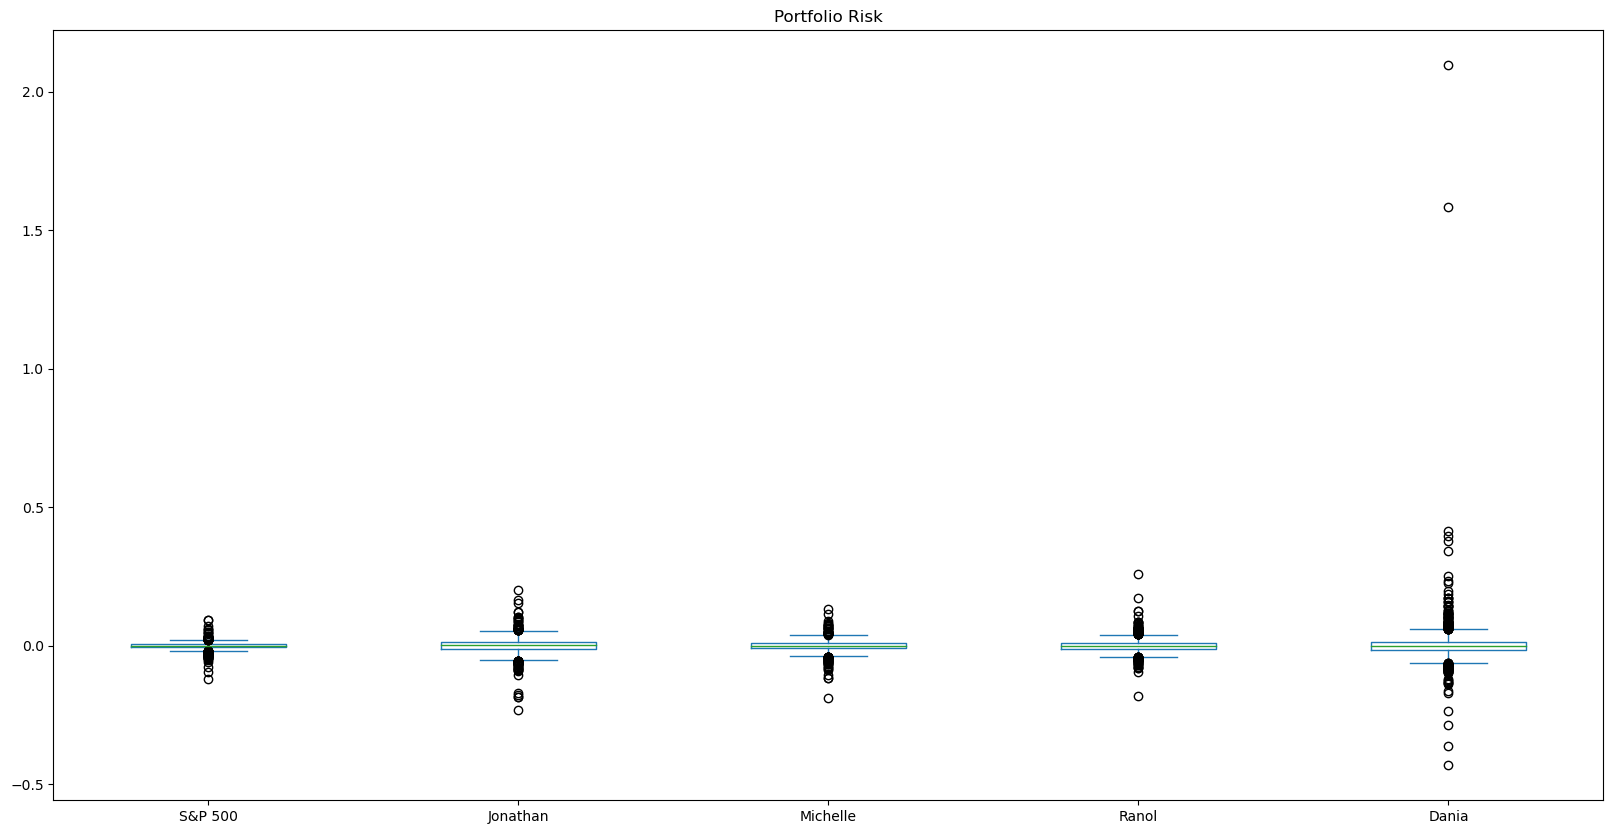

In [70]:
sp500_daily_returns.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [71]:
sp500_daily_returns.std()

S&P 500     0.012143
Jonathan    0.028220
Michelle    0.019678
Ranol       0.023055
Dania       0.076144
dtype: float64

In [72]:
sp500_risk = sp500_daily_returns["S&P 500"].std()

sp500_daily_returns.std() > sp500_risk

S&P 500     False
Jonathan     True
Michelle     True
Ranol        True
Dania        True
dtype: bool

In [73]:
df = sp500_daily_returns.corr()
df.style.background_gradient(cmap="bwr")

In [75]:
all_stock_data = pd.concat([j_portfolio_seven_years, michelle_portfolio_seven_years,ranol_portfolio_seven_years, d_portfolio_seven_years],axis="columns", join="inner")

all_stock_data

NVDA                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2017-03-02 05:00:00+00:00   99.00  102.8400   98.8900      108508  102.27   
2017-03-03 05:00:00+00:00   98.43   98.7700   96.2200      120337   98.60   
2017-03-06 05:00:00+00:00   97.67   98.1000   95.1700      120058   96.99   
2017-03-07 05:00:00+00:00   98.74   99.5300   97.1500       86234   97.67   
2017-03-08 05:00:00+00:00   98.56  101.3000   98.4700       84984  100.68   
...                           ...       ...       ...         ...     ...   
2023-10-26 04:00:00+00:00  403.26  422.5555  398.8019      797846  418.53   
2023-10-27 04:00:00+00:00  405.00  412.0600  400.1500      542551  411.30   
2023-10-30 04:00:00+00:00  411.61  417.6600  404.8100      496606  410.87   
2023-10-31 04:00:00+00:00  407.80  408.7900  392.3001      674321  404.50   
2023-11-01 04:00:00+00:00  423.25  423.8100  408.6900      574693  408.84   

                                                   META                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2017-03-02 05:00:00+00:00  19366998  100.280688  136.76  137.8200  136.3100   
2017-03-03 05:00:00+00:00  22276792   97.848958  137.17  137.3300  136.0800   
2017-03-06 05:00:00+00:00  22575540   96.510847  137.42  137.8300  136.5100   
2017-03-07 05:00:00+00:00  15583926   98.562605  137.30  138.3700  136.9900   
2017-03-08 05:00:00+00:00  16399640   99.771548  137.72  137.9900  137.0516   
...                             ...         ...     ...       ...       ...   
2023-10-26 04:00:00+00:00  54158206  407.003983  288.35  295.0000  279.4030   
2023-10-27 04:00:00+00:00  41678442  405.790138  296.73  299.3100  292.9700   
2023-10-30 04:00:00+00:00  38813054  410.834863  302.66  309.3967  299.0500   
2023-10-31 04:00:00+00:00  51813742  401.836488  301.27  303.6800  296.8600   
2023-11-01 04:00:00+00:00  43780062  417.707338  311.85  312.7400  301.8500   

                           ...    GME                       NOK               \
                           ...   open   volume       vwap close  high    low   
timestamp                  ...                                                 
2017-03-02 05:00:00+00:00  ...  24.47  2565724  24.900159  5.22  5.25  5.200   
2017-03-03 05:00:00+00:00  ...  25.06  1913125  25.196291  5.28  5.29  5.230   
2017-03-06 05:00:00+00:00  ...  25.28  2352608  24.899244  5.28  5.30  5.260   
2017-03-07 05:00:00+00:00  ...  24.79  2947058  24.686565  5.23  5.25  5.210   
2017-03-08 05:00:00+00:00  ...  24.75  2550075  24.893202  5.18  5.22  5.160   
...                        ...    ...      ...        ...   ...   ...    ...   
2023-10-26 04:00:00+00:00  ...  13.73  2036419  13.537001  3.24  3.25  3.190   
2023-10-27 04:00:00+00:00  ...  13.51  2481701  13.200050  3.25  3.29  3.245   
2023-10-30 04:00:00+00:00  ...  13.15  3475939  12.840184  3.29  3.30  3.250   
2023-10-31 04:00:00+00:00  ...  12.85  4574637  13.481180  3.31  3.34  3.290   
2023-11-01 04:00:00+00:00  ...  13.78  3430138  13.220931  3.24  3.29  3.220   

                                                                 
                          trade_count  open    volume      vwap  
timestamp                                                        
2017-03-02 05:00:00+00:00       11641  5.21  19360770  5.217851  
2017-03-03 05:00:00+00:00       13990  5.26  12111416  5.268503  
2017-03-06 05:00:00+00:00       13151  5.30   7440862  5.279397  
2017-03-07 05:00:00+00:00        8249  5.22   8867449  5.227836  
2017-03-08 05:00:00+00:00        8468  5.19   8743935  5.193429  
...                               ...   ...       ...       ...  
2023-10-26 04:00:00+00:00       33740  3.20  28650168  3.232126  
2023-10-27 04:00:00+00:00       27775  3.27  20108844  3.27012

In [76]:
MC_ten_year = MCSimulation(
    portfolio_data = all_stock_data,
    weights = [1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12],
    num_simulation = 500,
    num_trading_days = 252 * 10
) 

MC_ten_year.portfolio_data

NVDA                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2017-03-02 05:00:00+00:00   99.00  102.8400   98.8900      108508  102.27   
2017-03-03 05:00:00+00:00   98.43   98.7700   96.2200      120337   98.60   
2017-03-06 05:00:00+00:00   97.67   98.1000   95.1700      120058   96.99   
2017-03-07 05:00:00+00:00   98.74   99.5300   97.1500       86234   97.67   
2017-03-08 05:00:00+00:00   98.56  101.3000   98.4700       84984  100.68   
...                           ...       ...       ...         ...     ...   
2023-10-26 04:00:00+00:00  403.26  422.5555  398.8019      797846  418.53   
2023-10-27 04:00:00+00:00  405.00  412.0600  400.1500      542551  411.30   
2023-10-30 04:00:00+00:00  411.61  417.6600  404.8100      496606  410.87   
2023-10-31 04:00:00+00:00  407.80  408.7900  392.3001      674321  404.50   
2023-11-01 04:00:00+00:00  423.25  423.8100  408.6900      574693  408.84   

                                                                META  \
                             volume        vwap daily_return   close   
timestamp                                                              
2017-03-02 05:00:00+00:00  19366998  100.280688          NaN  136.76   
2017-03-03 05:00:00+00:00  22276792   97.848958    -0.005758  137.17   
2017-03-06 05:00:00+00:00  22575540   96.510847    -0.007721  137.42   
2017-03-07 05:00:00+00:00  15583926   98.562605     0.010955  137.30   
2017-03-08 05:00:00+00:00  16399640   99.771548    -0.001823  137.72   
...                             ...         ...          ...     ...   
2023-10-26 04:00:00+00:00  54158206  407.003983    -0.034778  288.35   
2023-10-27 04:00:00+00:00  41678442  405.790138     0.004315  296.73   
2023-10-30 04:00:00+00:00  38813054  410.834863     0.016321  302.66   
2023-10-31 04:00:00+00:00  51813742  401.836488    -0.009256  301.27   
2023-11-01 04:00:00+00:00  43780062  417.707338     0.037886  311.85   

                                     ...        GME                NOK        \
                               high  ...       vwap daily_return close  high   
timestamp                            ...                                       
2017-03-02 05:00:00+00:00  137.8200  ...  24.900159          NaN  5.22  5.25   
2017-03-03 05:00:00+00:00  137.3300  ...  25.196291     0.012010  5.28  5.29   
2017-03-06 05:00:00+00:00  137.8300  ...  24.899244    -0.014636  5.28  5.30   
2017-03-07 05:00:00+00:00  138.3700  ...  24.686565    -0.009635  5.23  5.25   
2017-03-08 05:00:00+00:00  137.9900  ...  24.893202     0.013377  5.18  5.22   
...                             ...  ...        ...          ...   ...   ...   
2023-10-26 04:00:00+00:00  295.0000  ...  13.537001    -0.015317  3.24  3.25   
2023-10-27 04:00:00+00:00  299.3100  ...  13.200050    -0.028148  3.25  3.29   
2023-10-30 04:00:00+00:00  309.3967  ...  12.840184    -0.024390  3.29  3.30   
2023-10-31 04:00:00+00:00  303.6800  ...  13.481180     0.075781  3.31  3.34   
2023-11-01 04:00:00+00:00  312.7400  ...  13.220931    -0.055192  3.24  3.29   

                                                                        \
                             low trade_count  open    volume      vwap   
timestamp                                                                
2017-03-02 05:00:00+00:00  5.200       11641  5.21  19360770  5.217851   
2017-03-03 05:00:00+00:00  5.230       13990  5.26  12111416  5.268503   
2017-03-06 05:00:00+00:00  5.260       13151  5.30   7440862  5.279397   
2017-03-07 05:00:00+00:00  5.210        8249  5.22   8867449  5.227836   
2017-03-08 05:00:00+00:00  5.160        8468  5.19   8743935  5.193429   
...                          ...         ...   ...       ...       ...   
2023-10-26 04:00:00+00:00  3.190       33740  3.20  28650168  3.232126   
2023-10-27 04:00:00+00:00  3.245       27775  3.27  20108844  3.270125   
2023-1

In [77]:
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3         4         5    \
0     1.000000   1.000000   1.000000   1.000000  1.000000  1.000000   
1     0.997141   1.014194   0.991627   1.010289  1.018504  1.011184   
2     1.027001   1.030964   1.012451   1.012641  1.002800  0.967497   
3     1.006028   1.039745   1.005878   1.030550  1.024800  0.961815   
4     1.024060   1.052026   1.025267   1.020978  1.034970  0.956053   
...        ...        ...        ...        ...       ...       ...   
2516  8.249339  33.438747  14.525776  22.995365  9.275222  9.659130   
2517  8.511412  32.691838  14.707914  22.897993  8.892608  9.768329   
2518  8.556770  33.032632  14.793125  22.650419  8.915029  9.891609   
2519  8.654210  34.107491  14.265798  23.048577  8.809791  9.843861   
2520  8.641523  33.621647  14.276122  22.226189  8.786509  9.570250   

            6         7           8          9    ...        490        491  \
0      1.000000  1.000000    1.000000   1.000000  ...   1.000000   1.000000   
1      1.008964  1.036006    1.011654   1.024788  ...   0.955613   0.988361   
2      0.988486  1.020428    1.007868   1.021789  ...   0.974766   0.967215   
3      1.004682  1.004134    1.008159   0.998852  ...   0.968942   0.981441   
4      0.997483  1.007067    0.970888   1.011878  ...   0.941391   0.967219   
...         ...       ...         ...        ...  ...        ...        ...   
2516  12.785929  3.601380   96.060498  29.058020  ...  45.991414  19.802454   
2517  12.731223  3.572995  100.373087  29.382437  ...  44.611016  19.821981   
2518  12.851537  3.584535   99.679933  29.029144  ...  44.316409  19.362998   
2519  12.722956  3.602948  101.142023  28.859357  ...  43.146010  19.242030   
2520  12.923444  3.593471  100.144740  29.043562  ...  42.903635  18.962985   

            492       493        494        495        496       497  \
0      1.000000  1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.006696  0.961273   0.952949   1.035029   1.037486  1.035104   
2      0.984885  0.959840   0.955437   1.062493   1.043049  1.028264   
3      0.983143  0.941459   0.925002   1.063179   1.050734  1.039380   
4      0.979099  0.952102   0.912625   1.082429   1.047548  1.015515   
...         ...       ...        ...        ...        ...       ...   
2516  39.608347  6.541817  11.181457  12.827217  12.481161  3.900883   
2517  39.598796  6.864250  11.096541  12.647852  12.361636  3.849364   
2518  39.197575  7.009542  11.555396  13.101124  12.171429  3.839420   
2519  38.108920  7.061172  11.567631  13.256803  11.760667  3.846567   
2520  39.987186  7.061547  11.641825  13.141478  11.855668  3.871953   

            498        499  
0      1.000000   1.000000  
1      1.022643   0.999023  
2      0.991003   1.018100  
3      1.006033   1.029052  
4      1.018374   1.002573  
...         ...        ...  
2516  31.261893  15.078966  
2517  31.580424  14.605477  
2518  31.523201  14.503951  
2519  30.892309  14.495203  
2520  31.200608  14.987719  

[2521 rows x 500 columns]

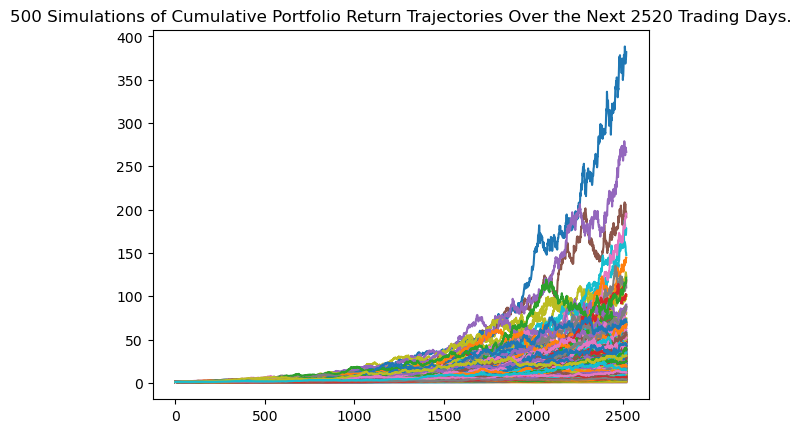

In [78]:
line_plot = MC_ten_year.plot_simulation()

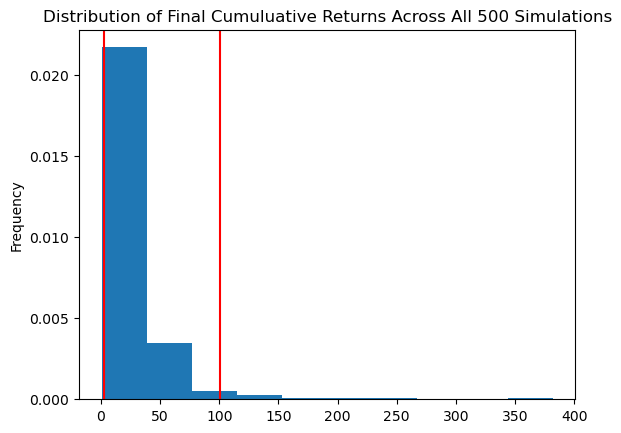

In [79]:
dist_plot = MC_ten_year.plot_distribution()

In [80]:
tbl = MC_ten_year.summarize_cumulative_return()

print(tbl)

count           500.000000
mean             24.177252
std              31.862683
min               0.580528
25%               7.970008
50%              14.895961
75%              27.588116
max             381.744079
95% CI Lower      2.231830
95% CI Upper    100.201333
Name: 2520, dtype: float64


In [81]:
initial_investment = 20000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $44636.6 and $2004026.66
